Mean Squared Error: 0.9116159861274993
R^2 Score: 0.895804962892335


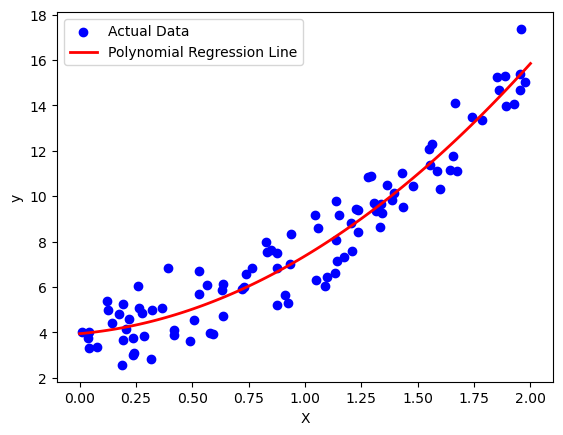

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X**2 + 4 + np.random.randn(100, 1)  # Quadratic relationship

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2
poly_features = PolynomialFeatures(degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()